## Microsoft Movie Pitch Submission

* Student name: **Ashleigh Stephens**
* Student pace: FLEX 60 Wk
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL: N/A

# I. Business Understanding
***Business Objectives***: To get Microsoft in on all the creating original video content fun the other big companies are having, we're exploring what types of films have performed the best at the box office.
<br><br>
To give greater insight into creating movies, we're translating findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create in a new movie studio.
<br><br>
***Assess Situation***: Our resources contained in the folder `zippedData` are movie datasets from:

* [Box Office Mojo](https://www.boxofficemojo.com/)
* [IMDB](https://www.imdb.com/)
* [Rotten Tomatoes](https://www.rottentomatoes.com/)
* [TheMovieDB](https://www.themoviedb.org/)
* [The Numbers](https://www.the-numbers.com/)

Using our resources we will yield three concrete business recommendations based on data analysis while providing visualizations to support our suggestions with the following project requirements:

* A jupyter notebook with your technical analysis
* A 5-10 minute non-technical executive summary presentation
* A GitHub repository that contains:
  * the .ipynb notebook file
  * the .pdf of your presentation
  * a README summarizing your results
<br><br>
***Data Mining Goals***: In addition to defining the business objectives, you should also define what success looks like from a technical data mining perspective.
<br><br>
***Project Plan***: The selected technologies and tools and define detailed plans for each project phase is to follow:

In [6]:
# **Importing Data**
 
# Packages to preform data analysis of files
import pandas as pd  # Alias pandas to be referred to as pd
import numpy as np  # Alias numpy to be referred to as np
import seaborn as sns  # Alias seaborn to be referred to as sns
import sqlite3 # Importing SQL
import matplotlib.pyplot as plt  # Alias matplotlib.pyplot to be referred to as plt

# For linear regression fitting
# MOST LIKELY CAN DELETE EXCEPT FOR MAYBE THE FIRST LINE
from matplotlib import style
from statistics import mean
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Code to show all outputs in the cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"   

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None) # For pandas 
import sys
sys.setrecursionlimit(1500)

# Built-in Magic Commands to Utilize:
#%matplotlib inline # renders plots in the notebook itself
#%pwd # print the current working directory
#%cd # change working directory
#%ls # show contents in the current directory
#%load [insert Python filename here] # load code into the Jupyter notebook
#%store [insert variable here] # this lets you pass variables between Jupyter Notebooks
#%who # use this to list all variables

In [7]:
# # load the following to run CPI analysis
# from datetime import date
# # Importing CPI to do inflation adjustments
# # only for python version 3 or higher
# import cpi  

Now that we have all the packages and necessary additions, we need to make sure we are working with accurate inflation rates when using CPI's data. This update can be timely, so best to only run at the start of the notebook and then '#" it out when manipulating the notebook. 

In [108]:
# run the following to get the latest CPI data
# mostly skip due to time it takes to load
# cpi.update()

# II. Data Understanding
***Collect initial data***: Acquire the necessary data and (if necessary) load it into your analysis tool.
<br><br>
The data we will work with is saved in the folder `zippedData` and we will import them. Fortunately, Pandas supports zip files, so we won't need combine and open the data. 

In [8]:
# ***loading zip files***

# tmdb.movies.csv.gz
Mrawdf = pd.read_csv("/Users/as/Documents/Flatiron/Project_1/dsc-phase-1-project-v2-3/zippedData/tmdb.movies.csv.gz")
# rt.movie_info.tsv.gz
RTMIrawdf = pd.read_table("/Users/as/Documents/Flatiron/Project_1/dsc-phase-1-project-v2-3/zippedData/rt.movie_info.tsv.gz")
# tn.movie_budgets.csv.gz
MBrawdf = pd.read_csv("/Users/as/Documents/Flatiron/Project_1/dsc-phase-1-project-v2-3/zippedData/tn.movie_budgets.csv.gz")
# imdb.title.basics.csv.gz
TBrawdf = pd.read_csv("/Users/as/Documents/Flatiron/Project_1/dsc-phase-1-project-v2-3/zippedData/imdb.title.basics.csv.gz")

# Maybes
# bom.movie_gross.csv.gz
MGrawdf = pd.read_csv("/Users/as/Documents/Flatiron/Project_1/dsc-phase-1-project-v2-3/zippedData/bom.movie_gross.csv.gz")

# Maybe Maybes
# imdb.title.crew.csv.gz
TCrawdf = pd.read_csv("/Users/as/Documents/Flatiron/Project_1/dsc-phase-1-project-v2-3/zippedData/imdb.title.crew.csv.gz")
# imdb.title.principals.csv.gz
TPrawdf = pd.read_csv("/Users/as/Documents/Flatiron/Project_1/dsc-phase-1-project-v2-3/zippedData/imdb.title.principals.csv.gz")


***Describing data***: Examine the data and document its surface properties like data format, number of records, or field identities.
<br><br>

Doing a quick glance at the data will provide a snapshot into the issues that will lay ahead. 

In [20]:
print(f'Movie Gross:', dup(MGrawdf))
print(f'Movie Info:',dup(RTMIrawdf))
print(f'Movie Budgets:', dup(MBrawdf))
print(f'Title Basics:', dup(TBrawdf))
print(f'Movies:', dup(Mrawdf))
print(f'Title Crew:', dup(TCrawdf))
print(f'Title Principals:', dup(TPrawdf))

ValueError: keep must be either "first", "last" or False

***Explore data***: Dig deeper into the data. Query it, visualize it, and identify relationships among the data.
<br><br>
***Verify data quality***: How clean/dirty is the data? Document any quality issues.
<br><br>

# III. Data Preparation
***Select data***: Determine which data sets will be used and document reasons for inclusion/exclusion.
<br><br>
***Clean data***: Often this is the lengthiest task. Without it, you’ll likely fall victim to garbage-in, garbage-out. A common practice during this task is to correct, impute, or remove erroneous values.
<br><br>
***Construct data***: Derive new attributes that will be helpful. For example, derive someone’s body mass index from height and weight fields.
<br><br>
***Integrate data***: Create new data sets by combining data from multiple sources.
<br><br>
***Format data***: Re-format data as necessary. For example, you might convert string values that store numbers to numeric values so that you can perform mathematical operations.
<br><br>

# IV. Modeling
Here you’ll likely build and assess various models based on several different modeling techniques. This phase has four tasks:

***Select Modeling Techniques***: Determine which algorithms to try (e.g. regression, neural net).
<br><br>
***Generate Test Design***: Pending your modeling approach, you might need to split the data into training, test, and validation sets.
<br><br>
***Build Model***: As glamorous as this might sound, this might just be executing a few lines of code like “reg = LinearRegression().fit(X, y)”.
<br><br>
***Assess Model***: Generally, multiple models are competing against each other, and the data scientist needs to interpret the model results based on domain knowledge, the pre-defined success criteria, and the test design.
<br><br>
Although the CRISP-DM Guide suggests to “iterate model building and assessment until you strongly believe that you have found the best model(s)”,  in practice teams should continue iterating until they find a “good enough” model, proceed through the CRISP-DM lifecycle, then further improve the model in future iterations. 
<br><br>

# V. Evaluation
Whereas the Assess Model task of the Modeling phase focuses on technical model assessment, the Evaluation phase looks more broadly at which model best meets the business and what to do next. This phase has three tasks:

***Evaluate Results***: Do the models meet the business success criteria? Which one(s) should we approve for the business?
<br><br>
***Review Process***: Review the work accomplished. Was anything overlooked? Were all steps properly executed? Summarize findings and correct anything if needed.
<br><br>
***Next Steps***: Based on the previous three tasks, determine whether to proceed to deployment, iterate further, or initiate new projects.
<br><br>

# **Importing Data**

### Obtaining Files

Loading zip files necessary for data analysis.

### Data Analysis Formulas

Due to several calculations applying to multiple dataframes (df), the following functions are defined:
1. **Spread**: This function returns the dataframes' 'Shape' with 'Null Sum' and 'Null Percentage' per column within dataframe.
2. **dup**: Shows you the length and width, and sum of duplicate data within df, with the sum and percentage of duplicate data within each column of the df.
3. **dup_list**: This function returns the duplicate enteries within a column of the df.

**Spread**:
Shows the 'Shape' within the dataframe with 'Null Sum' and 'Null Percentage' per column within dataframe.

The fuction allows us to see brief insight into the data, allowing us to make adequate assumptions before proceeding. Using `df.shape` we can see the size and shape before merging data, making sure data isn't lost. Null Sum Per Column allows us to see what columns exist, and the null data within each, utilizing `df.isna().sum()`. By dividing the missing data sum by length, we are given the Null Percentage within Columns; significant missing data will be replaced or culled on a case by case bases. 

In [110]:
# Formula to shorten time and show
# the 'Shape', 'Null Sum' and 'Null Percentage' 
def spread(df):
    PercentNull = (df.apply(lambda x: x.isna().sum()
                   / len(df))) * 100 
    
    return print(f'***Shape:***', df.shape,
                 f'***Null Sum Per Column:***', df.isna().sum(),
                 f'***Null Percentage within Columns:***',
                 (round(PercentNull, 2)))

**dup**:
Shows you the length and width, and sum of duplicate data within df, with the sum and percentage of duplicate data within each column of the df.

In [3]:
def dup(df):
    dups = df.duplicated(keep=False)
    SumDups = dups.values.sum()
    SumDupsnCol = (df.apply(
        lambda x: x.duplicated(keep=False).values.sum())
                  )
    PercentDups = (df.apply(
        lambda x: x.duplicated(keep=False).values.sum()/ len(df))
                  ) * 100 
    
    return print(f'***Shape:***', df.shape,
                 f'***Duplicate Sum:***', SumDups,
                 f'***Duplicate Sum Per Column:***',
                 (round(SumDupsnCol, 2)),
                 f'***Duplicate Percentage within Columns:***',
                 (round(PercentDups, 2)))

In [19]:
# FUCKING FIX THIS!
def dup(df):
    dups = df.duplicated(keep=False)
    SumDups = dups.values.sum()
    SumDupsnCol = (df.apply(
        lambda x: x.duplicated(keep=False).values.sum())
                  )
    PercentDups = (SumDupsnCol / len(df)
                  ) * 100 
    
    return print(f'***Shape:***', df.shape,
                 f'***Duplicate Sum:***', SumDups,
                 f'***Duplicate Sum Per Column:***',
                 (round(SumDupsnCol, 2)),
                 f'***Duplicate Percentage within Columns:***',
                 (round(PercentDups, 2)))

**dup_list**:
Shows you the duplicate enteries within a column of the df.

In [112]:
# To check and see the amount of 
# data duplicated wtihin column
def dup_list(column,df):
    duplicates = df[df.duplicated(keep=False)]
    return duplicates.sort_values([column])

In [113]:
# To check and see the amount of data duplicated within df
def dupS(df):
        dup = df.duplicated(keep=False)
        sumOfDups = dup.values.sum()
        boolenOfDups = dup.value_counts()
        return sumOfDups, boolenOfDups 

## Data Scrubing

#### Movie Gross 

In [114]:
# MGrawdf = bom.movie_gross.csv.gz
# Look at Movie Gross 
MGrawdf.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [115]:
spread(MGrawdf)

***Shape:*** (3387, 5) ***Null Sum Per Column:*** title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64 ***Null Percentage within Columns:*** title              0.00
studio             0.15
domestic_gross     0.83
foreign_gross     39.86
year               0.00
dtype: float64


Within Movie Gross, columns stuido and domestic_gross are under 1%, so removing the missing values are the best to clean the data and keep the remaining column data; `df.dropna(subset=['column'])`.

Unfortunately, `foreign_gross` has nearly 40% of missing values. Due to uncertainy we are unsure if the data is missing, or if the film never opened in foreign markets, and therefore remove the entire column. If we could pull the data from another table or website, then we may be able to assign $0 value to those movies that never made it to foreign markets and assign true missing and null values respectfully. Alas, we will delete the column due to data availability using `df.drop`.

In [116]:
# cull 'foreign_gross' and remove null values 
# from dataframe, saving as new df
MGdf = MGrawdf.dropna(subset=['studio', 'domestic_gross'])
# , 'foreign_gross'])
#.drop('foreign_gross', 1)

# check null values were dropped
spread(MGdf) 

***Shape:*** (3356, 5) ***Null Sum Per Column:*** title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64 ***Null Percentage within Columns:*** title              0.0
studio             0.0
domestic_gross     0.0
foreign_gross     40.2
year               0.0
dtype: float64


Due to missing data being removed from stuido and domestic_gross, altering the overall data shape, the percentage for `foreign_gross` changed slightly.

In [117]:
spread(MGdf)

***Shape:*** (3356, 5) ***Null Sum Per Column:*** title                0
studio               0
domestic_gross       0
foreign_gross     1349
year                 0
dtype: int64 ***Null Percentage within Columns:*** title              0.0
studio             0.0
domestic_gross     0.0
foreign_gross     40.2
year               0.0
dtype: float64


In [118]:
# MGdf['foreign_gross'] = MGdf['foreign_gross'].fillna(MGdf['foreign_gross'].median())

# MGdf.head()

Although, we don't need the infomation associated with missing foreign_gross data, we can use this to sum for present data with `domestic_gross` to acheive `worldwide_gross`. 

In [119]:
# # Replace dollar sign and commas for 'foreign_gross'
# # and change column to float64
# MGdf['foreign_gross'] = MGdf[
#     'foreign_gross'].str.replace(
#     'NaN', '0').str.replace(
#     ',', '').apply(
#     pd.to_numeric
# )

In [120]:
# # PROB DON'T USE
# # root_squared_error vs r_squared
# def root_squared_error(y, y_hat):
#     y_bar = y.mean()
#     ss_tot = ((y-y_bar)**2).sum()
#     ss_res = ((y-y_hat)**2).sum()
#     return 1 - (ss_res/ss_tot)

In [121]:
#SKIP root_squared_error(MGdf['foreign_gross'], MGdf['domestic_gross'])

In [122]:
# # BROKEN
# # Lets get a linear regression line to extract
# # and apply a coeficiant to missing foreign_gross
# X = MGdf['domestic_gross'].iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
# Y = MGdf['foreign_gross'].iloc[:, 3].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
# linear_regressor = LinearRegression()  # create object for the class
# linear_regressor.fit(X, Y)  # perform linear regression
# Y_pred = linear_regressor.predict(X)  # make predictions

In [123]:
# # WORKS BUT NO
# # data = MGdf  # load data set
# X = data.iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
# Y = data.iloc[:, 3].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
# linear_regressor = LinearRegression()  # create object for the class
# linear_regressor.fit(X, Y)  # perform linear regression
# Y_pred = linear_regressor.predict(X)  # make predictions

In [124]:
# # LAME PLOT
# # plt.scatter(X, Y)
# plt.plot(X, Y_pred, color='red')
# plt.show();

In [125]:
# dir()

In [126]:
# def score(self, X, Y, sample_weight=None):
#     from .metrics import r2_score
#     Y_pred = self.predict(X)
#     return r2_score(Y, Y_pred, sample_weight=sample_weight)

# def _more_tags(self):
#         return {"requires_y": True}

In [127]:
# # Lets get a linear regression line to extract
# # and apply a coeficiant to missing foreign_gross
# X = MGdf['domestic_gross'].iloc[:, 2].values.reshape(-1, 1)  # values converts it into a numpy array
# Y = MGdf['foreign_gross'].iloc[:, 3].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
# linear_regressor = LinearRegression()  # create object for the class
# linear_regressor.fit(X, Y)  # perform linear regression
# Y_pred = linear_regressor.predict(X)  # make predictions

# plt.scatter(X, Y)
# plt.plot(X, Y_pred, color='red')
# plt.show();
# style.use('seaborn')
# plt.scatter(X, Y,
#             label='Data Points',
#             alpha=0.6,
#             color='blue',
#             s=75)
# # plt.scatter(KSI_height,KSI_weight, label='KSI prediction',color='red',s=100)
# plt.plot(X,
#          regression_line,
#          label='Best Fit Line',
#          color='red',
#          linewidth=4)
# plt.title('Domestic and Foreign Gross Linear Regression')
# plt.xlabel('Domestic Gross (USD)')
# plt.ylabel('Foreign Gross (USD)')
# plt.legend()
# plt.show();

In [128]:
# def best_fit_line(xs,ys):
#     slope = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs) * mean(xs)) - mean(xs * XS)))
#     y_intecept = mean(ys) - slope * mean(XS)
#     return slope, y_intercept

# # convert 'domestic_gross' and 'foreign_gross' columns to lists
# DG = MGdf['domestic_gross'].tolist()
# FG = MGdf['foreign_gross'].tolist()

# # convert lists to numpy lists
# xs = np.array(DG, dtype=np.float64)
# ys = np.array(FG, dtype=np.float64)

# # Using Python's sk-learn library

# # Create linear regression object
# DG_FG = linear_model.LinearRegression()

# # Train the model using the training sets
# DG_FG.fit(xs.reshape(-1,1),ys)

# # get the regression line using the model
# regression_line = DG_FG.predict(xs.reshape(-1,1))

# # Making predictions
# # KSI_height = 180
# # KSI_weight = height_weight.predict(np.array([[KSI_height]]))[0]

# # Plot outputs and plot customization
# style.use('seaborn')
# plt.scatter(xs,ys,
#             label='Data Points',
#             alpha=0.5,
#             color='blue',
#             s=55)
# # plt.scatter(KSI_height,KSI_weight, label='KSI prediction',color='red',s=100)
# plt.plot(X,
#          regression_line,
#          label='Best Fit Line',
#          color='red',
#          linewidth=4)
# plt.title('Domestic and Foreign Gross Linear Regression')
# plt.xlabel('Domestic Gross (USD)')
# plt.ylabel('Foreign Gross (USD)')
# plt.legend()
# plt.show();

In [129]:
# # convert 'domestic_gross' and 'foreign_gross' columns to lists
# DG = MGdf['domestic_gross'].tolist()
# FG = MGdf['foreign_gross'].tolist()

# # convert lists to numpy lists
# xs = np.array(DG, dtype=np.float64)
# ys = np.array(FG, dtype=np.float64)

# def best_fit_line(xs, ys):
#     DG = MGdf['domestic_gross'].tolist()
#     FG = MGdf['foreign_gross'].tolist()
#     xs = np.array(DG, dtype=np.float64)
#     ys = np.array(FG, dtype=np.float64)
#     slope = (((mean(xs) * mean(ys)) - mean(xs * ys)) /
#              ((mean(xs) * mean(xs)) - mean(xs * xs)))
#     y_intercept = mean(ys) - slope * mean(xs)
#     return slope, y_intercept

# best_fit_line(MGdf['domestic_gross'], MGdf['foreign_gross'])

In [130]:
# ## ALREADY PERFORMED ABOVE
# # convert 'domestic_gross' and 'foreign_gross' columns to lists
# DG = MGdf['domestic_gross'].tolist()
# FG = MGdf['foreign_gross'].tolist()

# # convert lists to numpy lists
# xs = np.array(DG, dtype=np.float64)
# ys = np.array(FG, dtype=np.float64)

In [131]:
# #skip
# # Create a model and fit it
# model = LinearRegression().fit(xs, ys)
# r_sq = model.score(xs, ys)
# print(f"coefficient of determination: {r_sq}")


# print(f"intercept: {model.intercept_}")


# print(f"coefficients: {model.coef_}")

In [132]:
# # remove null values from dataframe
# MGdf = MGrawdf.dropna(subset=['foreign_gross'])


# # Make new column
# MGdf ['worldwide_gross'] = (
#     (MGdf ['domestic_gross'])
#     + MGdf ['foreign_gross']
# )

# # Review df
# MGdf.head()

In [133]:
# spread(MGdf)

Now to remove the `foreign_gross` column. 

# Remove foreign_gross column
MGdf = MGdf.drop('foreign_gross', 1).drop('year', 1)

# Stop Skip

In [134]:
# Rename title and runtime columns
MGdf.rename({'title': 'movie_title'},
                    axis='columns', inplace = True)

In [135]:
# Check changes
MGdf.head()

,movie_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [136]:
# To check and see the amount, 
# if any values of the data are duplicated
dup(MGdf)

***Shape:*** (3356, 5) ***Duplicate Sum:*** 0 ***Duplicate Sum Per Column:*** movie_title          2
studio            3251
domestic_gross    2280
foreign_gross     2512
year              3356
dtype: int64 ***Duplicate Percentage within Columns:*** movie_title         0.06
studio             96.87
domestic_gross     67.94
foreign_gross      74.85
year              100.00
dtype: float64


We can expect duplicates within many of the columns, but definitely not `movie_title`, so we will need to deal with that. 

In [137]:
# df0.columns = ['movie' if x == 'title' else x for x in df0.columns]

In [138]:
# Lets see what years the data covers
MGdf.year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [139]:
MGdf['studio'].unique()

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Wein.', 'Sony',
       'FoxS', 'SGem', 'WB (NL)', 'LGF', 'MBox', 'CL', 'W/Dim.', 'CBS',
       'Focus', 'MGM', 'Over.', 'Mira.', 'IFC', 'CJ', 'NM', 'SPC', 'ParV',
       'Gold.', 'JS', 'RAtt.', 'Magn.', 'Free', '3D', 'UTV', 'Rela.',
       'Zeit.', 'Anch.', 'PDA', 'Lorb.', 'App.', 'Drft.', 'Osci.', 'IW',
       'Rog.', 'Eros', 'Relbig.', 'Viv.', 'Hann.', 'Strand', 'NGE',
       'Scre.', 'Kino', 'Abr.', 'CZ', 'ATO', 'First', 'GK', 'FInd.',
       'NFC', 'TFC', 'Pala.', 'Imag.', 'NAV', 'Arth.', 'CLS', 'Mont.',
       'Olive', 'CGld', 'FOAK', 'IVP', 'Yash', 'ICir', 'FM', 'Vita.',
       'WOW', 'Truly', 'Indic.', 'FD', 'Vari.', 'TriS', 'ORF', 'IM',
       'Elev.', 'Cohen', 'NeoC', 'Jan.', 'MNE', 'Trib.', 'Rocket',
       'OMNI/FSR', 'KKM', 'Argo.', 'SMod', 'Libre', 'FRun', 'WHE', 'P4',
       'KC', 'SD', 'AM', 'MPFT', 'Icar.', 'AGF', 'A23', 'Da.', 'NYer',
       'Rialto', 'DF', 'KL', 'ALP', 'LG/S', 'WGUSA', 'MPI', 'RTWC', 'FIP',
  

#### Movies

In [140]:
# Mrawdf = tmdb.movies.csv.gz
# Look at Movies
Mrawdf.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Alright, we do not need a ton of these columns, so let's ditch `Unnamed: 0`, `genre_ids`, `id`, `original_language`, `original_title`, `vote_average` and `vote_count` for now, and see what we have. 

In [141]:
# Drop columns
MDdf = Mrawdf.drop(columns=['Unnamed: 0',
        'genre_ids',
        'id',
        'original_language',
        'original_title',
        'vote_average',
        'vote_count'
    ]
)

# Proof df
MDdf.head()

,popularity,release_date,title
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,28.734,2010-03-26,How to Train Your Dragon
2,28.515,2010-05-07,Iron Man 2
3,28.005,1995-11-22,Toy Story
4,27.920,2010-07-16,Inception


In [142]:
spread(MDdf)

***Shape:*** (26517, 3) ***Null Sum Per Column:*** popularity      0
release_date    0
title           0
dtype: int64 ***Null Percentage within Columns:*** popularity      0.0
release_date    0.0
title           0.0
dtype: float64


No null data was detected within the df, so we can continue forward with renaming the columns for future merging.

In [143]:
# Rename column 'title' to 'movie_title'
MDdf.rename(columns = {'title': 'movie_title'}, inplace = True)

# Check changes
MDdf.head()

,popularity,release_date,movie_title
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,28.734,2010-03-26,How to Train Your Dragon
2,28.515,2010-05-07,Iron Man 2
3,28.005,1995-11-22,Toy Story
4,27.920,2010-07-16,Inception


In [144]:
# To check and see the amount of data duplicated
# Don't need if getting ride of columns
dupS(MDdf)

(2020,
 False    24497
 True      2020
 dtype: int64)

The duplicate data seems to be duplicated across all columns, so we can easily get ready of the duplicates. 

In [145]:
# To check and see the amount of data duplicated
dup(MDdf)

***Shape:*** (26517, 3) ***Duplicate Sum:*** 2020 ***Duplicate Sum Per Column:*** popularity      22754
release_date    26134
movie_title      3439
dtype: int64 ***Duplicate Percentage within Columns:*** popularity      85.81
release_date    98.56
movie_title     12.97
dtype: float64


In [146]:
dup_list('movie_title', MDdf)

,popularity,release_date,movie_title
6315,1.420,2013-01-11,$ellebrity
9191,1.420,2013-01-11,$ellebrity
20070,0.600,2018-01-29,'85: The Greatest Team in Pro Football History
26340,0.600,2018-01-29,'85: The Greatest Team in Pro Football History
18016,5.409,2017-02-10,1 Night
21298,5.409,2017-02-10,1 Night
11705,4.205,2015-07-10,"10,000 km"
14850,4.205,2015-07-10,"10,000 km"
21096,7.317,2016-06-08,100 Streets
17782,7.317,2016-06-08,100 Streets


Lets drop those duplicates, because we do not need them!

In [147]:
# Drop duplicates, keep the first entry and save in new df
Mdf = MDdf.drop_duplicates(keep="first")

# To double check all duplicates are gone
dupS(Mdf)

(0,
 False    25495
 dtype: int64)

In [148]:
# Lets see the shape and spread
spread(Mdf)

***Shape:*** (25495, 3) ***Null Sum Per Column:*** popularity      0
release_date    0
movie_title     0
dtype: int64 ***Null Percentage within Columns:*** popularity      0.0
release_date    0.0
movie_title     0.0
dtype: float64


This data looks clear from duplicates, unnecessary columns, and null values. Let's check out the head to verify. 

In [149]:
Mdf.head()

,popularity,release_date,movie_title
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1
1,28.734,2010-03-26,How to Train Your Dragon
2,28.515,2010-05-07,Iron Man 2
3,28.005,1995-11-22,Toy Story
4,27.920,2010-07-16,Inception


We want to extract the release month for each film, so we will need to see what type of data is within the column.

In [150]:
Mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25495 entries, 0 to 26516
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    25495 non-null  float64
 1   release_date  25495 non-null  object 
 2   movie_title   25495 non-null  object 
dtypes: float64(1), object(2)
memory usage: 796.7+ KB


The data type for `release_date` is object, so we need to change that using `pd.to_datetime` cfor extraction. 

In [151]:
# Changing datatype of 'release date' to extract the month
Mdf['release_date'] = pd.to_datetime(Mdf['release_date'])

# Create month column so we can plot it against profit
Mdf['release_month'] = pd.DatetimeIndex(
    Mdf['release_date']).month
    
Mdf.head()

,popularity,release_date,movie_title,release_month
0,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,11
1,28.734,2010-03-26,How to Train Your Dragon,3
2,28.515,2010-05-07,Iron Man 2,5
3,28.005,1995-11-22,Toy Story,11
4,27.920,2010-07-16,Inception,7


Extraction of month worked and the data is cleaned! Onward!

#### Movie Budgets

In [152]:
# MBrawdf = tn.movie_budgets.csv.gz
# Look at Movie Budgets
MBrawdf.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [153]:
spread(MBrawdf)

***Shape:*** (5782, 6) ***Null Sum Per Column:*** id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64 ***Null Percentage within Columns:*** id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64


In [154]:
# Check for duplicates 
dup(MBrawdf)

***Shape:*** (5782, 6) ***Duplicate Sum:*** 0 ***Duplicate Sum Per Column:*** id                   5782
release_date         4649
movie                 165
production_budget    5551
domestic_gross        651
worldwide_gross       458
dtype: int64 ***Duplicate Percentage within Columns:*** id                   100.00
release_date          80.40
movie                  2.85
production_budget     96.00
domestic_gross        11.26
worldwide_gross        7.92
dtype: float64


The data is clean, with no null values or duplicates, and is now ready for more indepth manipulations.

From the initial look at the data, renaming of the 'movie' column is necessary for merging down the line.

In [155]:
# Rename columns
MBrawdf.rename({'movie': 'movie_title'}, axis='columns', inplace = True)

# Review
MBrawdf.head()

,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Lets change the `worldwide_gross`, `domestic_gross` and `production_budget` columns to floating numbers for calculations. 

In [156]:
MBrawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie_title        5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Some of the columns, `production_budget`, `domestic_gross`, and `worldwide_gross`, are strings not intergers . We can resolve this with a `.replace()` method which will remove the dollar sign and commas which are not able to be converted to integers, and then the `.to_numeric` method.

In [157]:
#Copy MBrawdf into new df, and save changes into
MBNdf = MBrawdf.copy()

# Replace dollar sign and commas for 'production_budget'
MBNdf['production_budget'] = MBNdf[
    'production_budget'].str.replace('$', '')
MBNdf['production_budget'] = MBNdf[
    'production_budget'].str.replace(',', '')

# Replace dollar sign and commas for 'domestic_gross'
MBNdf['domestic_gross'] = MBNdf[
    'domestic_gross'].str.replace('$', '')
MBNdf['domestic_gross'] = MBNdf[
    'domestic_gross'].str.replace(',', '')

# Replace dollar sign and commas for 'world_wide gross'
MBNdf['worldwide_gross'] = MBNdf[
    'worldwide_gross'].str.replace('$', '')
MBNdf['worldwide_gross'] = MBNdf[
    'worldwide_gross'].str.replace(',', '')


# Use '.to_numeric' to change the 
# columns to integers
MBNdf['production_budget'] = MBNdf['production_budget'].apply(pd.to_numeric)
MBNdf['domestic_gross'] = MBNdf['domestic_gross'].apply(pd.to_numeric)
MBNdf['worldwide_gross'] = MBNdf['worldwide_gross'].apply(pd.to_numeric)


In [158]:
# Ensure the changes have taken place
print('Old df')
MBrawdf.info()
print('New df')
MBNdf.info()

Old df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie_title        5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
New df
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie_title        5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gr

In [159]:
# Check out the changes
MBNdf.head()

,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


Let's go ahead and change the datatype of `release_date` and extract year and month columns for each of the enteries. Also, we can get rid of `id`, and `release_date` after we extract the data we are after. 

In [160]:
# Changing datatype of 'release date' 
MBNdf['release_date'] = pd.to_datetime(
    MBNdf['release_date'])

# to extract the year for CPI 
MBNdf['year'] = pd.DatetimeIndex(
    MBNdf['release_date']).year

# to extract month for release month analysis 
MBNdf['release_month'] = pd.DatetimeIndex(
    MBNdf['release_date']).month

# deleting columns no longer needed
MBNdf = MBNdf.drop(columns=['id','release_date'])

# look at the changes
MBNdf.head()

,movie_title,production_budget,domestic_gross,worldwide_gross,year,release_month
0,Avatar,425000000,760507625,2776345279,2009,12
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5
2,Dark Phoenix,350000000,42762350,149762350,2019,6
3,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12


Before we go any further, we need to address inflation within the columns addressing monetary values. Inflation is the general rise in the price level of an economy over a period of time. Consumer price index (`CPI`) is most commonly used to measure inflation with the inflation rate, which is the annualized percentage change in a general price index. The data contains values that are not adjusted for inflations; know as `current dollars`. What we need is the monetary values after adjusting for inflation; know as `real dollars`.
The general formula used for adjusting the prices for inflation using the CPI is:
real_dollars = (current_dollars * cpi_new) / cpi_old

In [161]:
# Copy df for data manipulation
MBCDdf = MBNdf.copy()

# rename columns to make sure we don't get confused
# cd is 'current dollars'
MBCDdf = MBCDdf.rename(columns={"production_budget": "cd_production_budget", 
                       "domestic_gross": "cd_domestic_gross", 
                       "worldwide_gross": "cd_worldwide_gross", })

# take a look at the changes
MBCDdf.head()

,movie_title,cd_production_budget,cd_domestic_gross,cd_worldwide_gross,year,release_month
0,Avatar,425000000,760507625,2776345279,2009,12
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5
2,Dark Phoenix,350000000,42762350,149762350,2019,6
3,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12


Since `current dollars` are labeled, we will use cpi to extract the `real dollar` values from the df, and substitue the values back into a df for further analysis. 

In [162]:
# Create new df for changes
MBdf = MBNdf.copy()

# change current dollars to real dollars, save as new columns
# for "production_budget"
MBdf["production_budget"] = MBCDdf.apply(lambda x: cpi.inflate(
    x["cd_production_budget"], x["year"]), axis=1)

# for "domestic_gross"
MBdf["domestic_gross"] = MBCDdf.apply(lambda x: cpi.inflate(
    x["cd_domestic_gross"], x["year"]), axis=1)

# for "worldwide_gross"
MBdf["worldwide_gross"] = MBCDdf.apply(lambda x: cpi.inflate(
    x["cd_worldwide_gross"], x["year"]), axis=1)

# see if it worked!
MBdf.head()

,movie_title,production_budget,domestic_gross,worldwide_gross,year,release_month
0,Avatar,5.367944e+08,9.605558e+08,3.506651e+09,2009,12
1,Pirates of the Caribbean: On Stranger Tides,4.946242e+08,2.903946e+08,1.259646e+09,2011,5
2,Dark Phoenix,3.709638e+08,4.532367e+07,1.587326e+08,2019,6
3,Avengers: Age of Ultron,3.779589e+08,5.247591e+08,1.603998e+09,2015,5
4,Star Wars Ep. VIII: The Last Jedi,3.504304e+08,6.855848e+08,1.455581e+09,2017,12


In [163]:
# lets compare the differences in the columns
# new df - old df = changes in monetary values
MBdf.describe()-MBNdf.describe()

,production_budget,domestic_gross,worldwide_gross,year,release_month
count,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
mean,1.307600e+07,2.689860e+07,4.714790e+07,0.0,0.0
std,1.191165e+07,6.933881e+07,1.064905e+08,0.0,0.0
min,4.262007e+02,0.000000e+00,0.000000e+00,0.0,0.0
25%,3.203628e+06,5.921786e+05,1.933789e+06,0.0,0.0
50%,8.260911e+06,9.743852e+06,1.715446e+07,0.0,0.0
75%,2.023189e+07,2.991872e+07,4.838545e+07,0.0,0.0
max,1.117944e+08,2.936463e+09,4.836648e+09,0.0,0.0


Looking at the difference between the `real dollars` and `current dollars` you can see how drastically the data has increased.

To get a real look, let's compare one of the earliest enteries in the df. 

In [164]:
# OLD df with current dollars
MBCDdf[MBCDdf['year']== 1915]

,movie_title,cd_production_budget,cd_domestic_gross,cd_worldwide_gross,year,release_month
5677,The Birth of a Nation,110000,10000000,11000000,1915,2


In [165]:
# NEW df with real dollars
MBdf[MBdf['year']== 1915]

,movie_title,production_budget,domestic_gross,worldwide_gross,year,release_month
5677,The Birth of a Nation,2.951158e+06,2.682871e+08,2.951158e+08,1915,2


Looking at `production_budget`, you can see that the total INCREASED by over $2.8M!!
If we hadn't corrected for inflation, then we our data could have been misrepresented and bias when comparing amounts and presenting estimated predictions for future film budgets.  

In [166]:
spread(MBdf)

***Shape:*** (5782, 6) ***Null Sum Per Column:*** movie_title          0
production_budget    0
domestic_gross       0
worldwide_gross      0
year                 0
release_month        0
dtype: int64 ***Null Percentage within Columns:*** movie_title          0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
year                 0.0
release_month        0.0
dtype: float64


In [167]:
MBdf

,movie_title,production_budget,domestic_gross,worldwide_gross,year,release_month
0,Avatar,5.367944e+08,9.605558e+08,3.506651e+09,2009,12
1,Pirates of the Caribbean: On Stranger Tides,4.946242e+08,2.903946e+08,1.259646e+09,2011,5
2,Dark Phoenix,3.709638e+08,4.532367e+07,1.587326e+08,2019,6
3,Avengers: Age of Ultron,3.779589e+08,5.247591e+08,1.603998e+09,2015,5
4,Star Wars Ep. VIII: The Last Jedi,3.504304e+08,6.855848e+08,1.455581e+09,2017,12
5,Star Wars Ep. VII: The Force Awakens,3.498349e+08,1.070840e+09,2.347451e+09,2015,12
6,Avengers: Infinity War,3.237305e+08,7.325110e+08,2.210145e+09,2018,4
7,Pirates of the Caribbean: At Worldâs End,3.920624e+08,4.043737e+08,1.259070e+09,2007,5
8,Justice League,3.316376e+08,2.531769e+08,7.251202e+08,2017,11
9,Spectre,3.429754e+08,2.287351e+08,1.005628e+09,2015,11


Ta-da! This df is clean!

#### Title Basics

In [168]:
# TBrawdf = imdb.title.basics.csv.gz
# Take a look at Title Basics
TBrawdf.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [169]:
spread(TBrawdf)

***Shape:*** (146144, 6) ***Null Sum Per Column:*** tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64 ***Null Percentage within Columns:*** tconst              0.00
primary_title       0.00
original_title      0.01
start_year          0.00
runtime_minutes    21.72
genres              3.70
dtype: float64


We don't need `original_title` and `start_year`, so we can ditch those, and also drop null values from `runtime_minutes` and `genres`. 

In [170]:
# Remove undesired columns
TBrawDdf = TBrawdf.drop('original_title', 1).drop('start_year', 1)

# Removing the null values from columns
TBDdf = TBrawDdf.dropna(subset=['genres', 'runtime_minutes'])

# Check for changes
TBDdf.head()

,tconst,primary_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,122.0,Drama
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,75.0,Comedy


We will rename the `primary_title` and `runtime_minutes`.

In [171]:
# Make new df with copy
TBdf = TBDdf.copy()

# Rename title and runtime columns
TBdf.rename({'primary_title': 'movie_title',
            'runtime_minutes': 'runtime'},
                    axis='columns', inplace = True)

# Check
TBdf.head()

,tconst,movie_title,runtime,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,122.0,Drama
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,75.0,Comedy


In [172]:
# check for duplicated data
dup(TBdf)

***Shape:*** (112233, 4) ***Duplicate Sum:*** 0 ***Duplicate Sum Per Column:*** tconst              0
movie_title     11174
runtime        112141
genres         111998
dtype: int64 ***Duplicate Percentage within Columns:*** tconst          0.00
movie_title     9.96
runtime        99.92
genres         99.79
dtype: float64


In [173]:
# Check
TBdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112233 entries, 0 to 146139
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   tconst       112233 non-null  object 
 1   movie_title  112233 non-null  object 
 2   runtime      112233 non-null  float64
 3   genres       112233 non-null  object 
dtypes: float64(1), object(3)
memory usage: 4.3+ MB


With no duplicates and null values elimated, this data is cleaned and ready for merging. 

#### Rotten Tomatoes Movie Infomation

In [174]:
# rt.movie_info.tsv.gz
RTMIrawdf.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [175]:
spread(RTMIrawdf)

***Shape:*** (1560, 12) ***Null Sum Per Column:*** id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64 ***Null Percentage within Columns:*** id               0.00
synopsis         3.97
rating           0.19
genre            0.51
director        12.76
writer          28.78
theater_date    23.01
dvd_date        23.01
currency        78.21
box_office      78.21
runtime          1.92
studio          68.33
dtype: float64


We will cull the data with over 85% null values, dropping the columns `synopsis`,`rating`, `dvd_date`, `currency` and `box_office`. Additionally, we need to remove the null values within `genre`, `director`, `writer`, `theater_date`, `runtime` and `studio` columns. 

In [176]:
# Culling columms with over 85% null
RTMIDdf = RTMIrawdf.drop(columns=
                    ['synopsis',
                     'rating',
                     'dvd_date',
                     'currency',
                     'box_office'
                    ]
                   )

# Removing the null values from columns
RTMIdf = RTMIDdf.dropna(subset=
                   ['genre',
                    'director',
                    'writer',
                    'theater_date',
                    'runtime',
                    'studio'
                   ]
                  )

# Look at changes
spread(RTMIdf)

***Shape:*** (357, 7) ***Null Sum Per Column:*** id              0
genre           0
director        0
writer          0
theater_date    0
runtime         0
studio          0
dtype: int64 ***Null Percentage within Columns:*** id              0.0
genre           0.0
director        0.0
writer          0.0
theater_date    0.0
runtime         0.0
studio          0.0
dtype: float64


Let's rename `theater_date` to match the other dataframes. 

In [177]:
RTMIdf.rename({'theater_date': 'release_date'},
              axis='columns', inplace = True)
RTMIdf.head()

,id,genre,director,writer,release_date,runtime,studio
1,3,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One
5,8,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000",95 minutes,Warner Bros. Pictures
6,10,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002",82 minutes,Paramount Pictures
7,13,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006",123 minutes,Sony Pictures Classics
15,22,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010",108 minutes,ATO Pictures


In [178]:
dup(RTMIdf)

***Shape:*** (357, 7) ***Duplicate Sum:*** 0 ***Duplicate Sum Per Column:*** id                0
genre           302
director         56
writer           14
release_date     86
runtime         335
studio          250
dtype: int64 ***Duplicate Percentage within Columns:*** id               0.00
genre           84.59
director        15.69
writer           3.92
release_date    24.09
runtime         93.84
studio          70.03
dtype: float64


No dupliates are present within the data. YAH!!

Extraction of a release month column will be next. 

In [179]:
RTMIdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 1 to 1556
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            357 non-null    int64 
 1   genre         357 non-null    object
 2   director      357 non-null    object
 3   writer        357 non-null    object
 4   release_date  357 non-null    object
 5   runtime       357 non-null    object
 6   studio        357 non-null    object
dtypes: int64(1), object(6)
memory usage: 22.3+ KB


In [180]:
# Create month column 

RTMIdf['release_month'] = pd.DatetimeIndex(
    RTMIdf['release_date']).month
    
RTMIdf.head()

,id,genre,director,writer,release_date,runtime,studio,release_month
1,3,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,8
5,8,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000",95 minutes,Warner Bros. Pictures,3
6,10,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002",82 minutes,Paramount Pictures,1
7,13,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006",123 minutes,Sony Pictures Classics,4
15,22,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010",108 minutes,ATO Pictures,12


### Merging Tables

In [181]:
# Get a look at Movie Basics columns and 
# using the tail, the amount of data entries
MBdf.tail()

,movie_title,production_budget,domestic_gross,worldwide_gross,year,release_month
5777,Red 11,7553.712163,0.000000,0.000000,2018,12
5778,Following,9758.823529,78854.547059,391158.044118,1999,4
5779,Return to the Land of Wonders,6937.275986,1856.415054,1856.415054,2005,7
5780,A Plague So Pleasant,1600.551859,0.000000,0.000000,2015,9
5781,My Date With Drew,1526.200717,251186.276344,251186.276344,2005,8


In [182]:
# Checkout Title Basics columns and 
# using the tail, the amount of data entries
TBdf.tail()

,tconst,movie_title,runtime,genres
146134,tt9916160,Drømmeland,72.0,Documentary
146135,tt9916170,The Rehearsal,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,84.0,Documentary
146137,tt9916190,Safeguard,90.0,"Drama,Thriller"
146139,tt9916538,Kuambil Lagi Hatiku,123.0,Drama


In [183]:
MGdf.tail()

,movie_title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [184]:
RTMIdf.tail()

,id,genre,director,writer,release_date,runtime,studio,release_month
1537,1976,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016",123 minutes,Buffalo Films,2
1541,1980,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005",119 minutes,Universal Pictures,9
1542,1981,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012",129 minutes,Eros Entertainment,10
1545,1985,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007",98 minutes,IDP Distribution,6
1556,1997,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993",88 minutes,Paramount Vantage,7


In [185]:
# Make a new dataframe, 'mmsdf' = 'main movies df'
# by merging the two, on the shared 'movie_title' column.
mmsdf = MBdf.merge(TBdf, how='left', on='movie_title')

# View the new!
mmsdf.tail()

,movie_title,production_budget,domestic_gross,worldwide_gross,year,release_month,tconst,runtime,genres
6822,Red 11,7553.712163,0.000000,0.000000,2018,12,tt7837402,77.0,"Horror,Sci-Fi,Thriller"
6823,Following,9758.823529,78854.547059,391158.044118,1999,4,NaN,NaN,NaN
6824,Return to the Land of Wonders,6937.275986,1856.415054,1856.415054,2005,7,NaN,NaN,NaN
6825,A Plague So Pleasant,1600.551859,0.000000,0.000000,2015,9,tt2107644,76.0,"Drama,Horror,Thriller"
6826,My Date With Drew,1526.200717,251186.276344,251186.276344,2005,8,NaN,NaN,NaN


In [186]:
# check to see how much missing data we had
spread(mmsdf)

***Shape:*** (6827, 9) ***Null Sum Per Column:*** movie_title             0
production_budget       0
domestic_gross          0
worldwide_gross         0
year                    0
release_month           0
tconst               3518
runtime              3518
genres               3518
dtype: int64 ***Null Percentage within Columns:*** movie_title           0.00
production_budget     0.00
domestic_gross        0.00
worldwide_gross       0.00
year                  0.00
release_month         0.00
tconst               51.53
runtime              51.53
genres               51.53
dtype: float64


Oof, so much missing data on those last three columns; `tconst`, `runtime`, and `genres`. Those columns are keys, so we will cull the missing data, instead of the entire column, even though 52% of the data is missing within them.

In [187]:
# Removing the null values from columns
MMSdf = mmsdf.dropna(subset=['tconst','runtime','genres'])

# Check out the spread
spread(MMSdf)

***Shape:*** (3309, 9) ***Null Sum Per Column:*** movie_title          0
production_budget    0
domestic_gross       0
worldwide_gross      0
year                 0
release_month        0
tconst               0
runtime              0
genres               0
dtype: int64 ***Null Percentage within Columns:*** movie_title          0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
year                 0.0
release_month        0.0
tconst               0.0
runtime              0.0
genres               0.0
dtype: float64


In [188]:
# Check the changes
MMSdf.head()

,movie_title,production_budget,domestic_gross,worldwide_gross,year,release_month,tconst,runtime,genres
0,Avatar,5.367944e+08,9.605558e+08,3.506651e+09,2009,12,tt1775309,93.0,Horror
1,Pirates of the Caribbean: On Stranger Tides,4.946242e+08,2.903946e+08,1.259646e+09,2011,5,tt1298650,136.0,"Action,Adventure,Fantasy"
2,Dark Phoenix,3.709638e+08,4.532367e+07,1.587326e+08,2019,6,tt6565702,113.0,"Action,Adventure,Sci-Fi"
3,Avengers: Age of Ultron,3.779589e+08,5.247591e+08,1.603998e+09,2015,5,tt2395427,141.0,"Action,Adventure,Sci-Fi"
6,Avengers: Infinity War,3.237305e+08,7.325110e+08,2.210145e+09,2018,4,tt4154756,149.0,"Action,Adventure,Sci-Fi"


We will pull out individual genres and tconst for each entry because they are currently incapable of being read the way we need. So, we need to change them into stings and split them within each entry. Then we can explode out the data to apply to each entry, individually.

In [189]:
# Seperating the strings within columns by "," and replacing
# the columns within the same df.
MMSdf['tconst'] = MMSdf['tconst'].str.split(",")
MMSdf['genres'] = MMSdf['genres'].str.split(",")
MMSdf.head()

,movie_title,production_budget,domestic_gross,worldwide_gross,year,release_month,tconst,runtime,genres
0,Avatar,5.367944e+08,9.605558e+08,3.506651e+09,2009,12,[tt1775309],93.0,[Horror]
1,Pirates of the Caribbean: On Stranger Tides,4.946242e+08,2.903946e+08,1.259646e+09,2011,5,[tt1298650],136.0,"[Action, Adventure, Fantasy]"
2,Dark Phoenix,3.709638e+08,4.532367e+07,1.587326e+08,2019,6,[tt6565702],113.0,"[Action, Adventure, Sci-Fi]"
3,Avengers: Age of Ultron,3.779589e+08,5.247591e+08,1.603998e+09,2015,5,[tt2395427],141.0,"[Action, Adventure, Sci-Fi]"
6,Avengers: Infinity War,3.237305e+08,7.325110e+08,2.210145e+09,2018,4,[tt4154756],149.0,"[Action, Adventure, Sci-Fi]"


In [190]:
# Create a new df to assign the secondary column 
MMSEdf = MMSdf.explode('tconst')
MMSEIdf = MMSEdf.explode('genres')
MMSEIdf.head()

,movie_title,production_budget,domestic_gross,worldwide_gross,year,release_month,tconst,runtime,genres
0,Avatar,5.367944e+08,9.605558e+08,3.506651e+09,2009,12,tt1775309,93.0,Horror
1,Pirates of the Caribbean: On Stranger Tides,4.946242e+08,2.903946e+08,1.259646e+09,2011,5,tt1298650,136.0,Action
1,Pirates of the Caribbean: On Stranger Tides,4.946242e+08,2.903946e+08,1.259646e+09,2011,5,tt1298650,136.0,Adventure
1,Pirates of the Caribbean: On Stranger Tides,4.946242e+08,2.903946e+08,1.259646e+09,2011,5,tt1298650,136.0,Fantasy
2,Dark Phoenix,3.709638e+08,4.532367e+07,1.587326e+08,2019,6,tt6565702,113.0,Action


In [191]:
# this will take the first value to each column
# except 'tconst' and 'genres', which will make 
# them into lists, keeping all values associated
MMSEIdf = MMSEIdf.groupby('movie_title').agg(
    {
        'production_budget': lambda x: x.iloc[0],
        'domestic_gross': lambda x: x.iloc[0],
        'worldwide_gross': lambda x: x.iloc[0],
        'year': lambda x: x.iloc[0],
        'release_month': lambda x: x.iloc[0],
        'runtime': lambda x: x.iloc[0],
        'tconst': list,
        'genres': list
    }
)

In [192]:
# lets reset the index so we avoid issues
MMSEIdf = MMSEIdf.reset_index()

In [193]:
# pull associated data with "avengers"
MMSEIdf[MMSEIdf['movie_title']== 'Avengers: Infinity War']

,movie_title,production_budget,domestic_gross,worldwide_gross,year,release_month,runtime,tconst,genres
170,Avengers: Infinity War,3.237305e+08,7.325110e+08,2.210145e+09,2018,4,149.0,"[tt4154756, tt4154756, tt4154756]","[Action, Adventure, Sci-Fi]"


As you can see, this has multiple `tconst` values, all duplicates, and several genre we'd lose if we just took the first value across the board. Let's look into the datatypes, and then check for duplicates within each entry within `tconst` and `genres`. 

In [194]:
MMSEIdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2203 entries, 0 to 2202
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_title        2203 non-null   object 
 1   production_budget  2203 non-null   float64
 2   domestic_gross     2203 non-null   float64
 3   worldwide_gross    2203 non-null   float64
 4   year               2203 non-null   int64  
 5   release_month      2203 non-null   int64  
 6   runtime            2203 non-null   float64
 7   tconst             2203 non-null   object 
 8   genres             2203 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 155.0+ KB


In [195]:
# Check for duplicates within the columns themselves
count = 0
for record in MMSEIdf.to_dict('records'):
    if len(set(record['tconst'])) != len(record['tconst']):
        count += 1 
print(count)

1879


In [196]:
# Check for duplicates within the columns themselves
count = 0
for record in MMSEIdf.to_dict('records'):
    if len(set(record['genres'])) != len(record['genres']):
        count += 1 
print(count)

334


As you can see, we have alot of duplicate entries within the same entry, so we need to remove duplicates and keep unique values for each. 

In [197]:
# Remove the duplicates within the columns
MMSEIdf['tconst'] = MMSEIdf['tconst'].apply(lambda x:list(set(x)))
MMSEIdf['genres'] = MMSEIdf['genres'].apply(lambda x:list(set(x)))
MMSEIdf.tail()

,movie_title,production_budget,domestic_gross,worldwide_gross,year,release_month,runtime,tconst,genres
2198,Zoolander 2,5.645044e+07,3.257043e+07,6.248916e+07,2016,2,101.0,[tt1608290],[Comedy]
2199,Zoom,4.704340e+07,1.611482e+07,1.680953e+07,2006,8,96.0,"[tt3763866, tt5815346]","[Comedy, Drama, Animation, Romance]"
2200,Zootopia,1.693513e+08,3.852948e+08,1.150945e+09,2016,3,108.0,[tt2948356],"[Comedy, Animation, Adventure]"
2201,Zulu,1.861082e+07,0.000000e+00,2.145162e+06,2013,12,110.0,[tt2249221],"[Crime, Drama, Thriller]"
2202,xXx: Return of Xander Cage,9.396398e+07,4.963333e+07,3.814201e+08,2017,1,107.0,[tt1293847],"[Action, Adventure, Thriller]"


In [198]:
# Check for duplicates within the columns themselves
count = 0
for record in MMSEIdf.to_dict('records'):
    if len(set(record['tconst'])) != len(record['tconst']):
        count += 1 
print(count)

0


In [199]:
# Check for duplicates within the columns themselves
count = 0
for record in MMSEIdf.to_dict('records'):
    if len(set(record['genres'])) != len(record['genres']):
        count += 1 
print(count)

0


Duplicates wtihin tconst and genres has been removed, so the table should be clean.

In [200]:
MMSEIdf.head()

,movie_title,production_budget,domestic_gross,worldwide_gross,year,release_month,runtime,tconst,genres
0,#Horror,1.714877e+06,0.000000e+00,0.000000e+00,2015,11,101.0,[tt3526286],"[Horror, Crime, Drama]"
1,10 Cloverfield Lane,5.645044e+06,8.138234e+07,1.222563e+08,2016,3,103.0,[tt1179933],"[Horror, Drama, Mystery]"
2,10 Days in a Madhouse,1.371902e+07,1.670976e+04,1.670976e+04,2015,11,111.0,[tt3453052],[Drama]
3,12 Strong,3.776856e+07,4.944413e+07,7.674397e+07,2018,1,130.0,[tt1413492],"[Action, Drama, History]"
4,12 Years a Slave,2.326352e+07,6.591950e+07,2.105643e+08,2013,10,134.0,[tt2024544],"[Drama, History, Biography]"


Identifying Return on Investment (ROI)

Return on investment specifically looks at the dollar amount earned for the amount invested in a project. Instead of looking at overall profit, it looks at the specific benefit from the project divided by the costs. Here we will use `production_budget` and `worldwide_gross`. 


In [201]:
# ROI = Return on Investment = (Total Gross/Total Costs)*100
MMSEIdf['ROI'] = (round(
    ((MMSEIdf['worldwide_gross']- MMSEIdf['production_budget'])
    / MMSEIdf['production_budget'])
    *100, 0)
)

# Order the dataframe by the highest to lowest worldwide gross values.
MMSEIdf = MMSEIdf.sort_values(by=['ROI'], ascending=False)

# Top ROI movies
MMSEIdf.head()

,movie_title,production_budget,domestic_gross,worldwide_gross,year,release_month,runtime,tconst,genres,ROI
1704,The Gallows,1.143251e+05,2.602544e+07,4.762382e+07,2015,7,81.0,[tt2309260],"[Horror, Thriller, Mystery]",41556.0
185,Bambi,1.426333e+07,1.708890e+09,4.455212e+09,1942,8,58.0,[tt2668120],"[Documentary, Biography]",31135.0
1338,Rocky,4.762214e+06,5.582989e+08,1.071498e+09,1976,11,136.0,[tt3080284],"[Action, Drama, Comedy]",22400.0
1450,Snow White and the Seven Dwarfs,2.800023e+07,3.479810e+09,3.479810e+09,1937,12,49.0,[tt7821084],"[Animation, Family]",12328.0
1656,The Devil Inside,1.180214e+06,6.286166e+07,1.200980e+08,2012,1,83.0,[tt1560985],[Horror],10076.0


We need to constrain the data a bit so that we don't produce misleading results. Ideally, every movie would be low budget and high yeilding, but that isn't reality, so we need to drop some data within the columns.  

In [202]:
# Look into the ranges of data per column
MMSEIdf.describe()

,production_budget,domestic_gross,worldwide_gross,year,release_month,runtime,ROI
count,2.203000e+03,2.203000e+03,2.203000e+03,2203.000000,2203.000000,2203.000000,2203.000000
mean,4.496560e+07,6.002902e+07,1.397702e+08,2010.743985,6.946437,101.724013,266.857013
std,5.957574e+07,1.285180e+08,2.861329e+08,8.716694,3.497610,21.970154,1366.928383
min,1.600552e+03,0.000000e+00,0.000000e+00,1927.000000,1.000000,1.000000,-100.000000
25%,5.815880e+06,8.824770e+05,3.343330e+06,2010.000000,4.000000,90.000000,-64.000000
50%,2.288812e+07,2.344787e+07,4.228790e+07,2013.000000,7.000000,100.000000,66.000000
75%,5.559637e+07,6.977285e+07,1.408223e+08,2015.000000,10.000000,113.000000,263.500000
max,5.367944e+08,3.479810e+09,4.455212e+09,2019.000000,12.000000,180.000000,41556.000000


In [203]:
# to see what correlates before we begin to cull data
MMSEIdf.corr()

,production_budget,domestic_gross,worldwide_gross,year,release_month,runtime,ROI
production_budget,1.000000,0.507663,0.686707,0.010262,-0.009046,0.257036,-0.030947
domestic_gross,0.507663,1.000000,0.882469,-0.247520,0.030404,0.097889,0.359655
worldwide_gross,0.686707,0.882469,1.000000,-0.106347,0.026185,0.169481,0.314134
year,0.010262,-0.247520,-0.106347,1.000000,-0.042873,0.236525,-0.170863
release_month,-0.009046,0.030404,0.026185,-0.042873,1.000000,0.037879,0.007181
runtime,0.257036,0.097889,0.169481,0.236525,0.037879,1.000000,-0.026804
ROI,-0.030947,0.359655,0.314134,-0.170863,0.007181,-0.026804,1.000000


Therefore, we will create a dataframe using the last 9 years of movie data, with all movies over the mean `production_budget`. Otherwise the lower budgeted movies could skew the data because a higher `ROI` would be easier to attain, especially in the earlier years of film where options were lacking and collection data was less accurate. 

In [204]:
MMSPdf = MMSEIdf.query('production_budget > 22888120').query('year >= 2010')
MMSPdf.describe()

,production_budget,domestic_gross,worldwide_gross,year,release_month,runtime,ROI
count,8.460000e+02,8.460000e+02,8.460000e+02,846.000000,846.000000,846.000000,846.000000
mean,8.547185e+07,1.006816e+08,2.615589e+08,2013.846336,6.777778,111.173759,183.682033
std,6.856688e+07,1.135853e+08,3.167352e+08,2.659364,3.510293,19.277895,242.692406
min,2.289217e+07,0.000000e+00,0.000000e+00,2010.000000,1.000000,11.000000,-100.000000
25%,3.550309e+07,2.998224e+07,5.968461e+07,2011.000000,4.000000,99.000000,27.000000
50%,5.716257e+07,6.239953e+07,1.400928e+08,2014.000000,7.000000,109.000000,132.500000
75%,1.159801e+08,1.275353e+08,3.337318e+08,2016.000000,10.000000,123.000000,273.500000
max,4.946242e+08,7.554355e+08,2.210145e+09,2019.000000,12.000000,180.000000,1893.000000


In [205]:
# To see a quick depiction of how the values changed
MMSEIdf.describe()-MMSPdf.describe()

,production_budget,domestic_gross,worldwide_gross,year,release_month,runtime,ROI
count,1.357000e+03,1.357000e+03,1.357000e+03,1357.00000,1357.000000,1357.000000,1357.000000
mean,-4.050625e+07,-4.065254e+07,-1.217888e+08,-3.10235,0.168659,-9.449746,83.174980
std,-8.991144e+06,1.493263e+07,-3.060227e+07,6.05733,-0.012683,2.692259,1124.235976
min,-2.289057e+07,0.000000e+00,0.000000e+00,-83.00000,0.000000,-10.000000,0.000000
25%,-2.968721e+07,-2.909977e+07,-5.634128e+07,-1.00000,0.000000,-9.000000,-91.000000
50%,-3.427445e+07,-3.895166e+07,-9.780486e+07,-1.00000,0.000000,-9.000000,-66.500000
75%,-6.038376e+07,-5.776247e+07,-1.929095e+08,-1.00000,0.000000,-10.000000,-10.000000
max,4.217011e+07,2.724374e+09,2.245067e+09,0.00000,0.000000,0.000000,39663.000000


In [206]:
# to see what correlates after data is culled
MMSPdf.corr()

,production_budget,domestic_gross,worldwide_gross,year,release_month,runtime,ROI
production_budget,1.000000,0.639880,0.737466,0.051005,-0.004703,0.290492,0.114878
domestic_gross,0.639880,1.000000,0.935257,0.050107,0.016087,0.245571,0.635565
worldwide_gross,0.737466,0.935257,1.000000,0.079963,0.013643,0.258400,0.611911
year,0.051005,0.050107,0.079963,1.000000,-0.029017,0.052921,0.045403
release_month,-0.004703,0.016087,0.013643,-0.029017,1.000000,0.098644,0.040471
runtime,0.290492,0.245571,0.258400,0.052921,0.098644,1.000000,0.101315
ROI,0.114878,0.635565,0.611911,0.045403,0.040471,0.101315,1.000000


In [207]:
# Make new dataframe grouped by ROI in descending order
# indexed to only include the first 100 values
ROIdf = MMSPdf.sort_values(
    by=['ROI'], ascending=False)[:100]

# Ensure new element will be a pandas dataframe
ROIdf = pd.DataFrame(ROIdf)

# Lets see the top 10 ROI movies
ROIdf.head(10)

,movie_title,production_budget,domestic_gross,worldwide_gross,year,release_month,runtime,tconst,genres,ROI
856,It,3.869105e+07,3.620175e+08,7.710109e+08,2017,9,135.0,[tt1396484],"[Horror, Thriller]",1893.0
270,Bohemian Rhapsody,5.935060e+07,2.334133e+08,9.657802e+08,2018,11,134.0,[tt1727824],"[Music, Drama, Biography]",1527.0
1636,The Conjuring,2.326352e+07,1.598206e+08,3.698901e+08,2013,7,112.0,[tt1457767],"[Horror, Thriller, Mystery]",1490.0
1066,Minions,8.460060e+07,3.841848e+08,1.326556e+09,2015,7,91.0,[tt2293640],"[Comedy, Animation, Adventure]",1468.0
590,Fifty Shades of Grey,4.573005e+07,1.899709e+08,6.527943e+08,2015,2,125.0,[tt2322441],"[Drama, Thriller, Romance]",1327.0
699,Green Book,2.481934e+07,9.181016e+07,3.475079e+08,2018,11,130.0,[tt6966692],"[Comedy, Drama, Biography]",1300.0
437,Deadpool,6.548251e+07,4.099100e+08,9.043649e+08,2016,2,108.0,[tt1431045],"[Action, Comedy, Adventure]",1281.0
456,Despicable Me 3,8.290939e+07,2.925312e+08,1.143849e+09,2017,6,89.0,[tt3469046],"[Comedy, Animation, Adventure]",1280.0
455,Despicable Me 2,8.840138e+07,4.281248e+08,1.134349e+09,2013,7,98.0,[tt1690953],"[Comedy, Animation, Adventure]",1183.0
48,A Star is Born,3.884766e+07,2.323186e+08,4.677362e+08,2018,10,75.0,[tt1776364],"[Music, Documentary]",1104.0


In [208]:
round(ROIdf.describe() ,0)

,production_budget,domestic_gross,worldwide_gross,year,release_month,runtime,ROI
count,100.0,100.0,1.000000e+02,100.0,100.0,100.0,100.0
mean,98942005.0,273035440.0,7.076708e+08,2014.0,7.0,116.0,687.0
std,74366734.0,172917526.0,4.684435e+08,3.0,3.0,21.0,292.0
min,23263521.0,20988008.0,1.759650e+08,2010.0,1.0,64.0,411.0
25%,38808509.0,145477103.0,3.080622e+08,2012.0,4.0,102.0,476.0
50%,67531892.0,216120401.0,5.992056e+08,2014.0,6.0,113.0,588.0
75%,145110253.0,389605801.0,1.045286e+09,2016.0,10.0,133.0,778.0
max,323730521.0,755435494.0,2.210145e+09,2019.0,12.0,167.0,1893.0


In [209]:
# Mean values for each column:
round(ROIdf.mean() ,0)

production_budget     98942005.0
domestic_gross       273035440.0
worldwide_gross      707670772.0
year                      2014.0
release_month                7.0
runtime                    116.0
ROI                        687.0
dtype: float64

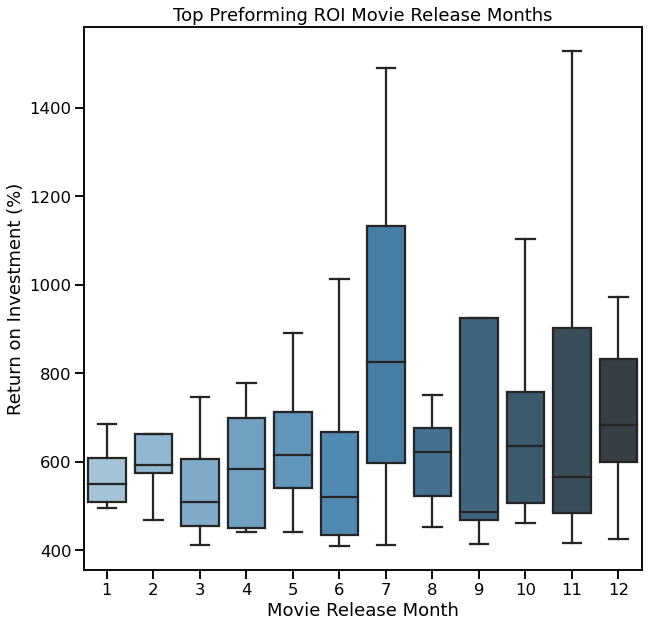

In [210]:
# Boxplot using release month vs ROI
# of Top 100 ROI Movies
x = ROIdf['release_month']
y = ROIdf['ROI']
f, ax = plt.subplots(figsize=(10,10))
sns.axes_style('whitegrid')
sns.set_context('talk') 
sns.boxplot(x, y, palette='Blues_d', showfliers=False)
plt.title('Top Preforming ROI Movie Release Months')
plt.ylabel('Return on Investment (%)')
plt.xlabel('Movie Release Month') 
plt.show();

While using the Top 100 ROI movies, you can see the largest return on investments were movies released during the months of May, April, and October, respectfully. 

In [211]:
print('Mean ROI Production Budget:', (round(ROIdf.production_budget.mean(), 0)),
      'Average ROI Domestic Gross:', (round(ROIdf.domestic_gross.mean(), 0)),
      'Mean ROI Worldwide Gross:', (round(ROIdf.worldwide_gross.mean(), 0)))

Mean ROI Production Budget: 98942005.0 Average ROI Domestic Gross: 273035440.0 Mean ROI Worldwide Gross: 707670772.0


{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

<AxesSubplot:xlabel='release_month', ylabel='ROI'>

Text(0.5, 1.0, 'Time of Year for ROI Movie Releases')

Text(0, 0.5, 'Return on Investment (%)')

Text(0.5, 0, 'Movie Release Month')

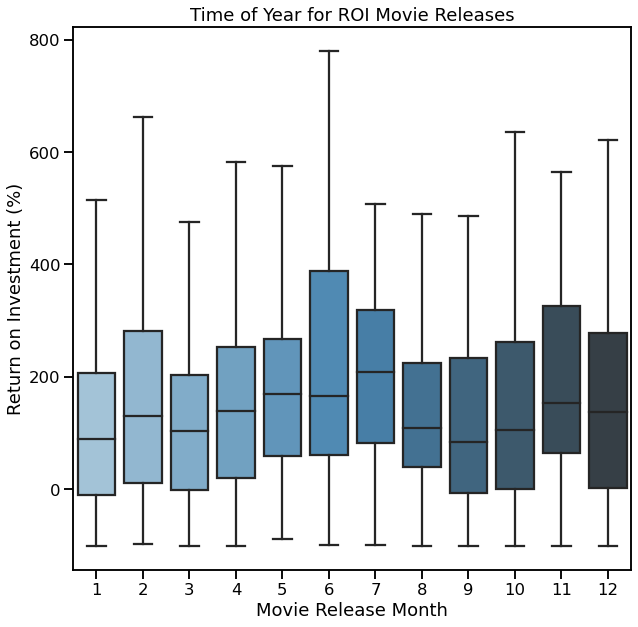

In [212]:
# Boxplot using release month vs ROI, for all df
x = MMSPdf['release_month']
y = MMSPdf['ROI']
f, ax = plt.subplots(figsize=(10,10))
sns.axes_style('whitegrid')
sns.set_context('talk') 
sns.boxplot(x, y, palette='Blues_d', showfliers=False)
plt.title('Time of Year for ROI Movie Releases')
plt.ylabel('Return on Investment (%)')
plt.xlabel('Movie Release Month') 
plt.show()

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

<AxesSubplot:xlabel='release_month', ylabel='ROI'>

Text(0.5, 1.0, 'Time of Year for ROI Movie Releases')

Text(0, 0.5, 'Return on Investment (%)')

Text(0.5, 0, 'Movie Release Month')

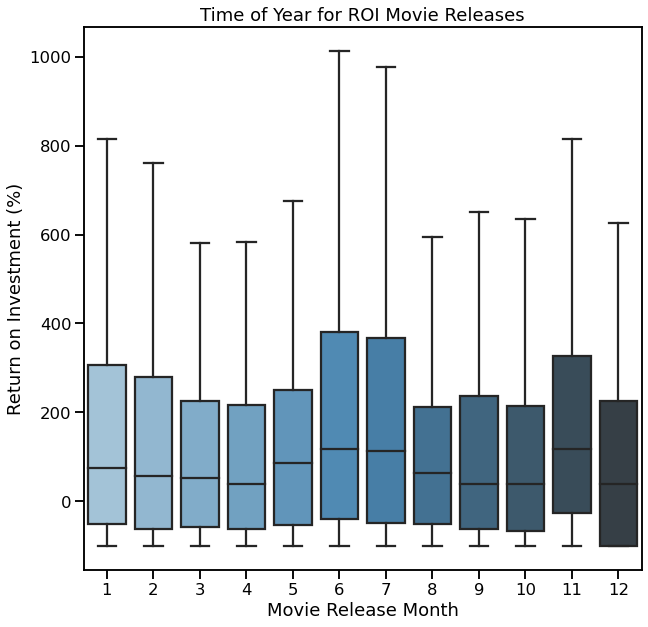

In [213]:
# Boxplot using release month vs ROI, for all df
x = MMSEIdf['release_month']
y = MMSEIdf['ROI']
f, ax = plt.subplots(figsize=(10,10))
sns.axes_style('whitegrid')
sns.set_context('talk') 
sns.boxplot(x, y, palette='Blues_d', showfliers=False)
plt.title('Time of Year for ROI Movie Releases')
plt.ylabel('Return on Investment (%)')
plt.xlabel('Movie Release Month') 
plt.show()

In [214]:
ROIdf.head()

,movie_title,production_budget,domestic_gross,worldwide_gross,year,release_month,runtime,tconst,genres,ROI
856,It,3.869105e+07,3.620175e+08,7.710109e+08,2017,9,135.0,[tt1396484],"[Horror, Thriller]",1893.0
270,Bohemian Rhapsody,5.935060e+07,2.334133e+08,9.657802e+08,2018,11,134.0,[tt1727824],"[Music, Drama, Biography]",1527.0
1636,The Conjuring,2.326352e+07,1.598206e+08,3.698901e+08,2013,7,112.0,[tt1457767],"[Horror, Thriller, Mystery]",1490.0
1066,Minions,8.460060e+07,3.841848e+08,1.326556e+09,2015,7,91.0,[tt2293640],"[Comedy, Animation, Adventure]",1468.0
590,Fifty Shades of Grey,4.573005e+07,1.899709e+08,6.527943e+08,2015,2,125.0,[tt2322441],"[Drama, Thriller, Romance]",1327.0


In [215]:
#creating for loop to fill genre columns with boolean values
for index, row in ROIdf.iterrows():
    if row['genres']:
        for genre in row['genres']:
            ROIdf.loc[index, genre] = 1

In [216]:
#pulling list of genres from the columns we created
cols = list(ROIdf.columns[11:])

#viewing to make sure list is correct
cols

['Thriller',
 'Music',
 'Drama',
 'Biography',
 'Mystery',
 'Comedy',
 'Animation',
 'Adventure',
 'Romance',
 'Action',
 'Documentary',
 'Sci-Fi',
 'Fantasy',
 'History',
 'Family',
 'Sport',
 'Crime',
 'Musical',
 'Western',
 'War']

In [217]:
# Create dictionary of genre sums as k:v pairings using for loop to 
# sum the bools for each genre
GSdict = {}
for col in cols:
    count = ROIdf[col].sum() 
    GSdict[col] = count
    
# View dictionary
GSdict

{'Thriller': 15.0,
 'Music': 5.0,
 'Drama': 38.0,
 'Biography': 9.0,
 'Mystery': 7.0,
 'Comedy': 37.0,
 'Animation': 21.0,
 'Adventure': 44.0,
 'Romance': 13.0,
 'Action': 39.0,
 'Documentary': 8.0,
 'Sci-Fi': 23.0,
 'Fantasy': 10.0,
 'History': 3.0,
 'Family': 8.0,
 'Sport': 2.0,
 'Crime': 11.0,
 'Musical': 3.0,
 'Western': 1.0,
 'War': 1.0}

In [218]:
#sorting dictionary values and choosing the # of movies at the 10th index (18)
#creating dict with only the common genres with more than 18 films
#using dictionary comprehension (items) to select k:v pairs where value > 18
sorted_dict = sorted(GSdict.values(),
                     reverse=True)[9]

TGSdict = {k: v for k, 
           v in GSdict.items()
           if v >= sorted_dict}

#viewing the minimum value of our new dictionary
sorted_dict

10.0

In [219]:
#viewing edited dictionary
TGSdict

{'Thriller': 15.0,
 'Drama': 38.0,
 'Comedy': 37.0,
 'Animation': 21.0,
 'Adventure': 44.0,
 'Romance': 13.0,
 'Action': 39.0,
 'Sci-Fi': 23.0,
 'Fantasy': 10.0,
 'Crime': 11.0}

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

<AxesSubplot:>

Text(0.5, 1.0, 'Top ROI Movie Genres')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Thriller'),
  Text(1, 0, 'Drama'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Animation'),
  Text(4, 0, 'Adventure'),
  Text(5, 0, 'Romance'),
  Text(6, 0, 'Action'),
  Text(7, 0, 'Sci-Fi'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Crime')])

Text(0, 0.5, 'Number of Movies')

Text(0.5, 0, 'Top 10 Movie Genres')

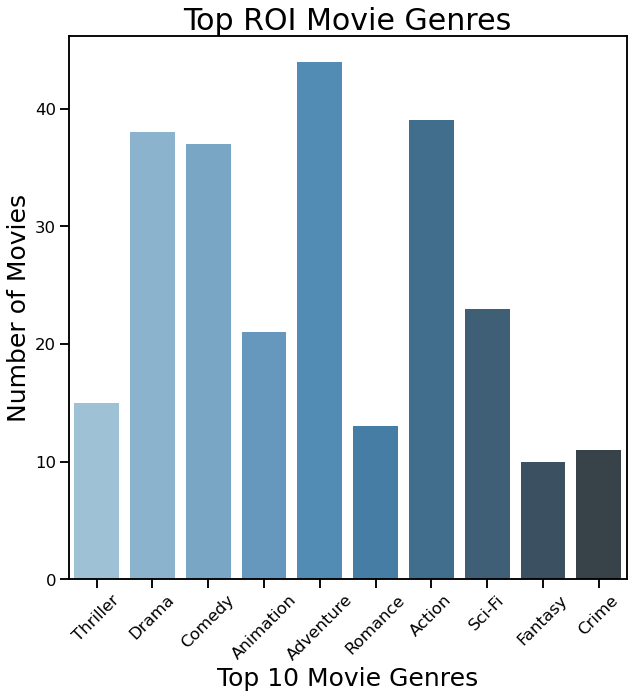

In [220]:
#creating x and y values to plot our dictionary
xgc = list(TGSdict.keys())
ygc = list(TGSdict.values())

#plotting a bar chart of genre and count dictionary
f, ax = plt.subplots(figsize=(10,10))
sns.axes_style('whitegrid')
sns.set_context('talk') 
sns.barplot(xgc, ygc, palette='Blues_d')
plt.title('Top ROI Movie Genres', fontsize=30)
plt.xticks(rotation=45)
plt.ylabel('Number of Movies', fontsize=25)
plt.xlabel('Top 10 Movie Genres', fontsize=25) 
plt.show()

{'figure.facecolor': 'white',
 'axes.labelcolor': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'axes.axisbelow': True,
 'grid.linestyle': '-',
 'text.color': '.15',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'xtick.top': False,
 'ytick.right': False,
 'axes.grid': True,
 'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'grid.color': '.8',
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True,
 'xtick.bottom': False,
 'ytick.left': False}

<AxesSubplot:>

Text(0.5, 1.0, 'Top ROI Movie Genres')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Thriller'),
  Text(1, 0, 'Drama'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Animation'),
  Text(4, 0, 'Adventure'),
  Text(5, 0, 'Romance'),
  Text(6, 0, 'Action'),
  Text(7, 0, 'Sci-Fi'),
  Text(8, 0, 'Fantasy'),
  Text(9, 0, 'Crime')])

Text(0, 0.5, 'Number of Movies')

Text(0.5, 0, 'Top 10 Movie Genres')

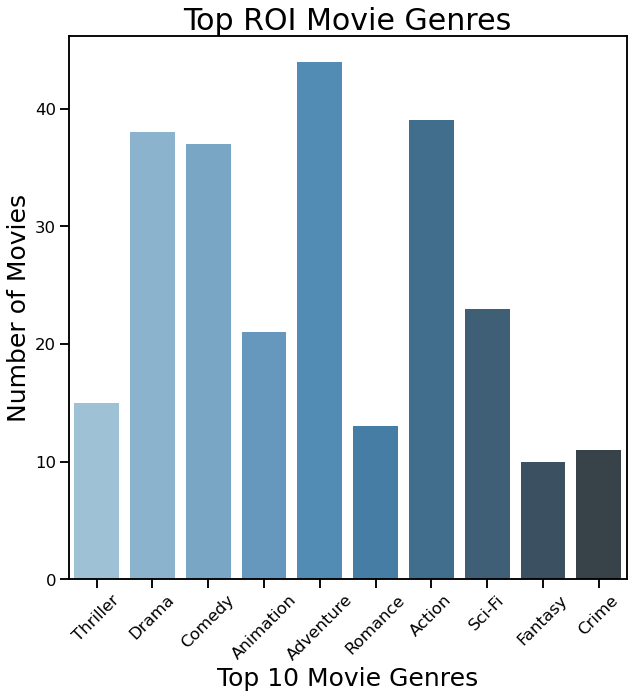

In [221]:
#creating x and y values to plot our dictionary
xgc = list(TGSdict.keys())
ygc = list(TGSdict.values())

#plotting a bar chart of genre and count dictionary
f, ax = plt.subplots(figsize=(10,10))
sns.axes_style('whitegrid')
sns.set_context('talk') 
sns.barplot(xgc, ygc, palette='Blues_d')
plt.title('Top ROI Movie Genres', fontsize=30)
plt.xticks(rotation=45)
plt.ylabel('Number of Movies', fontsize=25)
plt.xlabel('Top 10 Movie Genres', fontsize=25) 
plt.show()

In [222]:
RTMIdf.head()

,id,genre,director,writer,release_date,runtime,studio,release_month
1,3,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",108 minutes,Entertainment One,8
5,8,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000",95 minutes,Warner Bros. Pictures,3
6,10,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002",82 minutes,Paramount Pictures,1
7,13,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006",123 minutes,Sony Pictures Classics,4
15,22,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010",108 minutes,ATO Pictures,12


In [223]:
#checking the value counts for studios in this dataframe - 
#this dataset looks too short to use 
RTMIdf['studio'].value_counts()

Universal Pictures                          29
Paramount Pictures                          22
20th Century Fox                            18
Warner Bros. Pictures                       16
Sony Pictures                               12
Sony Pictures Classics                      12
New Line Cinema                              9
Columbia Pictures                            8
MGM                                          7
IFC Films                                    7
Miramax Films                                7
Lionsgate Films                              6
The Weinstein Company                        5
Focus Features                               5
Magnolia Pictures                            5
Paramount Vantage                            5
Lions Gate Films                             5
Warner Bros.                                 5
Roadside Attractions                         4
Buena Vista Pictures                         4
Fox Searchlight Pictures                     4
Open Road Fil

In [224]:
# Order the dataframe by the highest to lowest worldwide gross values.
TROIdf = ROIdf.sort_values(by=['ROI'], ascending=False)

# Check the changes
TROIdf.head(10)

,movie_title,production_budget,domestic_gross,worldwide_gross,year,release_month,runtime,tconst,genres,ROI,...,Documentary,Sci-Fi,Fantasy,History,Family,Sport,Crime,Musical,Western,War
856,It,3.869105e+07,3.620175e+08,7.710109e+08,2017,9,135.0,[tt1396484],"[Horror, Thriller]",1893.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,Bohemian Rhapsody,5.935060e+07,2.334133e+08,9.657802e+08,2018,11,134.0,[tt1727824],"[Music, Drama, Biography]",1527.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1636,The Conjuring,2.326352e+07,1.598206e+08,3.698901e+08,2013,7,112.0,[tt1457767],"[Horror, Thriller, Mystery]",1490.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1066,Minions,8.460060e+07,3.841848e+08,1.326556e+09,2015,7,91.0,[tt2293640],"[Comedy, Animation, Adventure]",1468.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590,Fifty Shades of Grey,4.573005e+07,1.899709e+08,6.527943e+08,2015,2,125.0,[tt2322441],"[Drama, Thriller, Romance]",1327.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
699,Green Book,2.481934e+07,9.181016e+07,3.475079e+08,2018,11,130.0,[tt6966692],"[Comedy, Drama, Biography]",1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
437,Deadpool,6.548251e+07,4.099100e+08,9.043649e+08,2016,2,108.0,[tt1431045],"[Action, Comedy, Adventure]",1281.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,Despicable Me 3,8.290939e+07,2.925312e+08,1.143849e+09,2017,6,89.0,[tt3469046],"[Comedy, Animation, Adventure]",1280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455,Despicable Me 2,8.840138e+07,4.281248e+08,1.134349e+09,2013,7,98.0,[tt1690953],"[Comedy, Animation, Adventure]",1183.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,A Star is Born,3.884766e+07,2.323186e+08,4.677362e+08,2018,10,75.0,[tt1776364],"[Music, Documentary]",1104.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [225]:
# Make top movies dfs
TROICdf = TROIdf[['movie_title', 'ROI', 'worldwide_gross']]
TWGCdf = MMSEIdf[['movie_title', 'ROI', 'worldwide_gross']]

# Create df for each order
TROICdf = TROICdf.sort_values(by=['ROI'], ascending=False)
TWGCdf = TWGCdf.sort_values(by=['worldwide_gross'], ascending=False)

# Top ROI Movies
TROICdf.head(50)

,movie_title,ROI,worldwide_gross
856,It,1893.0,7.710109e+08
270,Bohemian Rhapsody,1527.0,9.657802e+08
1636,The Conjuring,1490.0,3.698901e+08
1066,Minions,1468.0,1.326556e+09
590,Fifty Shades of Grey,1327.0,6.527943e+08
699,Green Book,1300.0,3.475079e+08
437,Deadpool,1281.0,9.043649e+08
456,Despicable Me 3,1280.0,1.143849e+09
455,Despicable Me 2,1183.0,1.134349e+09
48,A Star is Born,1104.0,4.677362e+08


In [226]:
TWGCdf.head(50)

,movie_title,ROI,worldwide_gross
185,Bambi,31135.0,4.455212e+09
2016,Titanic,1004.0,3.728089e+09
168,Avatar,553.0,3.506651e+09
1450,Snow White and the Seven Dwarfs,12328.0,3.479810e+09
170,Avengers: Infinity War,583.0,2.210145e+09
896,Jurassic World,667.0,1.885056e+09
1580,The Avengers,575.0,1.791489e+09
646,Furious 7,699.0,1.736282e+09
575,Fantasia,3554.0,1.612659e+09
169,Avengers: Age of Ultron,324.0,1.603998e+09


In [227]:
# Order the dataframe by the highest to lowest worldwide gross values.
MMSdf = MMSdf.sort_values(by=['worldwide_gross'], ascending=False)

# Check the changes
MMSdf.head(10)

,movie_title,production_budget,domestic_gross,worldwide_gross,year,release_month,tconst,runtime,genres
6292,Bambi,1.426333e+07,1.708890e+09,4.455212e+09,1942,8,[tt2668120],58.0,"[Biography, Documentary]"
45,Titanic,3.376573e+08,1.113195e+09,3.728089e+09,1997,12,[tt8852130],115.0,[Family]
0,Avatar,5.367944e+08,9.605558e+08,3.506651e+09,2009,12,[tt1775309],93.0,[Horror]
6038,Snow White and the Seven Dwarfs,2.800023e+07,3.479810e+09,3.479810e+09,1937,12,[tt7821084],49.0,"[Animation, Family]"
5619,Cinderella,3.260635e+07,9.557033e+08,2.963708e+09,1950,2,[tt10013634],150.0,[Musical]
5623,Cinderella,3.260635e+07,9.557033e+08,2.963708e+09,1950,2,[tt5684194],130.0,[Musical]
5622,Cinderella,3.260635e+07,9.557033e+08,2.963708e+09,1950,2,[tt5089556],113.0,[Fantasy]
5620,Cinderella,3.260635e+07,9.557033e+08,2.963708e+09,1950,2,[tt1661199],105.0,"[Drama, Family, Fantasy]"
5621,Cinderella,3.260635e+07,9.557033e+08,2.963708e+09,1950,2,[tt3645784],120.0,[Music]
6,Avengers: Infinity War,3.237305e+08,7.325110e+08,2.210145e+09,2018,4,[tt4154756],149.0,"[Action, Adventure, Sci-Fi]"


In [228]:
MMSdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3309 entries, 6292 to 6825
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_title        3309 non-null   object 
 1   production_budget  3309 non-null   float64
 2   domestic_gross     3309 non-null   float64
 3   worldwide_gross    3309 non-null   float64
 4   year               3309 non-null   int64  
 5   release_month      3309 non-null   int64  
 6   tconst             3309 non-null   object 
 7   runtime            3309 non-null   float64
 8   genres             3309 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 258.5+ KB


In [229]:
# Make a new dataframe, 'msdf' = 'movies studios df'
# by merging the two, on the shared 'movie_title' column.
# mmsdf = MBdf.merge(TBdf, how='left', on='movie_title')
msdf = mmsdf.merge(MGdf, how='right', on='movie_title')


# View the new!
msdf.tail()

,movie_title,production_budget,domestic_gross_x,worldwide_gross,year_x,release_month,tconst,runtime,genres,studio,domestic_gross_y,foreign_gross,year_y
3689,The Quake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Magn.,6200.0,NaN,2018
3690,Edward II (2018 re-release),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FM,4800.0,NaN,2018
3691,El Pacto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sony,2500.0,NaN,2018
3692,The Swan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Synergetic,2400.0,NaN,2018
3693,An Actor Prepares,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Grav.,1700.0,NaN,2018


In [230]:
spread(msdf)

***Shape:*** (3694, 13) ***Null Sum Per Column:*** movie_title             0
production_budget    2121
domestic_gross_x     2121
worldwide_gross      2121
year_x               2121
release_month        2121
tconst               2199
runtime              2199
genres               2199
studio                  0
domestic_gross_y        0
foreign_gross        1418
year_y                  0
dtype: int64 ***Null Percentage within Columns:*** movie_title           0.00
production_budget    57.42
domestic_gross_x     57.42
worldwide_gross      57.42
year_x               57.42
release_month        57.42
tconst               59.53
runtime              59.53
genres               59.53
studio                0.00
domestic_gross_y      0.00
foreign_gross        38.39
year_y                0.00
dtype: float64


In [231]:
# Drop columns
MSdf = msdf.dropna(subset=['production_budget',
        'domestic_gross',
        'worldwide_gross',
        'worldwide_gross',
        'genres'
                          ]
                  )

MSdf = msdf.drop(columns=['release_date',
        'release_month',
        'tconst',
        'runtime'
                         ]
                )
# Proof df
MDdf.head()

KeyError: ['domestic_gross']

In [ ]:
adjust values for inflation

GPM = (WWG - PD)*100 shows 


differences in GPM vs ROI
pull out year data

pull out outliers for each with .describe()

The Formula for Gross Profit Margin
\begin{aligned} &\text{Gross Profit Margin}=\frac{\text{Net Sales }-\text{ COGS}}{\text{Net Sales}}\\ \end{aligned} 
​
  
Gross Profit Margin = 
Net Sales
Net Sales − COGS
​
 
​
A company's gross profit margin percentage is calculated by first subtracting the cost of goods sold (COGS) from the net sales (gross revenues minus returns, allowances, and discounts). This figure is then divided by net sales, to calculate the gross profit margin in percentage terms. 

(https://www.investopedia.com/terms/g/gross_profit_margin.asp)

In [ ]:
# GPM = Gross Profit Margin = (Total Profit-Total Costs)/100
MMSEIdf['GPM'] = (round(
    (MMSEIdf['worldwide_gross']
    - MMSEIdf['production_budget']) 
    /MMSEIdf['worldwide_gross']), 1
)

# Make new dataframe grouped by GPM in descending order
# indexed to only include the first 100 values
GPMdf = MMSEIdf.sort_values(
    by=['GPM'], ascending=False)[:100]

# Ensure new element will be a pandas dataframe
GPMdf = pd.DataFrame(GPMdf)

GPMdf

In [ ]:
# Make new dataframe grouped by 
# top domestic grossing in descending order
# indexed to only include the first 100 values
TDGdf = MMSEIdf.sort_values(
    by=['domestic_gross'], ascending=False)[:100]
# Ensure new element will be a pandas dataframe
TDGdf = pd.DataFrame(TDGdf)

TDGdf

In [ ]:
# Make new dataframe grouped by
# top grossing worldwide in descending order
# indexed to only include the first 100 values
TWGdf = MMSEIdf.sort_values(
    by=['worldwide_gross'], ascending=False)[:100]
# Ensure new element will be a pandas dataframe
TWGdf = pd.DataFrame(TWGdf)

TWGdf